In [2]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
single_results_log = pd.read_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/result_log_single.xlsx")
single_results_rnd = pd.read_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/result_random_single.xlsx")
single_results_mlp = pd.read_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/result_mlp_single.xlsx")

In [ ]:
single_results_log["classifier"]  = ["Logistic Regression"] * len(single_results_log)

In [ ]:
single_results_rnd["classifier"]  = ["Random Forest"] * len(single_results_rnd)

In [ ]:
single_results_mlp["classifier"]  = ["MLP"] * len(single_results_mlp)

In [ ]:
single_results = pd.concat([single_results_log,single_results_rnd,single_results_mlp],axis = 0)

In [ ]:
single_results

,data,Test Results,Validation Results,Test Results_prob,Validation Results_prob,classifier
0,ct,0.573171,0.621212,0.573171,0.621212,Logistic Regression
1,ct,0.548780,0.545455,0.548780,0.545455,Logistic Regression
2,ct,0.634146,0.651515,0.634146,0.651515,Logistic Regression
3,ct,0.617284,0.515152,0.617284,0.515152,Logistic Regression
4,ct,0.543210,0.651515,0.543210,0.651515,Logistic Regression
...,...,...,...,...,...,...
95,weighted,0.658537,0.621212,0.670732,0.621212,MLP
96,weighted,0.548780,0.696970,0.536585,0.666667,MLP
97,weighted,0.731707,0.681818,0.743902,0.666667,MLP
98,weighted,0.543210,0.696970,0.555556,0.712121,MLP


In [ ]:
combined_results = pd.read_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/best_results_for_combined.xlsx")

In [ ]:
combined_results.rename(columns={'model':'classifier'}, inplace=True)

In [ ]:
pd.concat([single_results,combined_results]).to_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/complete_results.xlsx",index = False)

In [3]:
results = pd.read_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/complete_results.xlsx")
results

,data,Test Results,Validation Results,Test Results_prob,Validation Results_prob,classifier
0,ct,0.573171,0.621212,0.573171,0.621212,Logistic Regression
1,ct,0.548780,0.545455,0.548780,0.545455,Logistic Regression
2,ct,0.634146,0.651515,0.634146,0.651515,Logistic Regression
3,ct,0.617284,0.515152,0.617284,0.515152,Logistic Regression
4,ct,0.543210,0.651515,0.543210,0.651515,Logistic Regression
...,...,...,...,...,...,...
310,Combined,0.731707,0.772727,NaN,NaN,Random Forest
311,Combined,0.768293,0.803030,NaN,NaN,Random Forest
312,Combined,0.756098,0.803030,NaN,NaN,Random Forest
313,Combined,0.666667,0.727273,NaN,NaN,Random Forest


In [4]:
results= results.drop(results [ (results["data"] == "F8") |(results["data"] == "F9")| (results["data"] == "F10")  ].index,axis=0)

In [5]:
results["data"] = results["data"].apply(lambda x: {"ct":"CT","pet":"PET","weighted": "Weighted","wavedec":"Wavedec","F1":"LP","F2":"RP","F3":"DWT",
             "F4":"DTCWT" , "F5": "CVT","F6":"NSCT","F7":"LP+SR","F11":"CVT+SR","F12":"NSCT+SR","F13":"SR","F14":"BCF","HSI":"HSI","PCA":"PCA",
             "TR-FF":"TR-FF","TR-PCA":"TR-PCA","Combined":"FTD"}[x])

In [6]:
results["classifier"] = results["classifier"].apply(lambda x: {"MLP":"MLP","Random Forest": "RFC","Logistic Regression" : "LR"}[x])

In [7]:
results

,data,Test Results,Validation Results,Test Results_prob,Validation Results_prob,classifier
0,CT,0.573171,0.621212,0.573171,0.621212,LR
1,CT,0.548780,0.545455,0.548780,0.545455,LR
2,CT,0.634146,0.651515,0.634146,0.651515,LR
3,CT,0.617284,0.515152,0.617284,0.515152,LR
4,CT,0.543210,0.651515,0.543210,0.651515,LR
...,...,...,...,...,...,...
310,FTD,0.731707,0.772727,NaN,NaN,RFC
311,FTD,0.768293,0.803030,NaN,NaN,RFC
312,FTD,0.756098,0.803030,NaN,NaN,RFC
313,FTD,0.666667,0.727273,NaN,NaN,RFC


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker

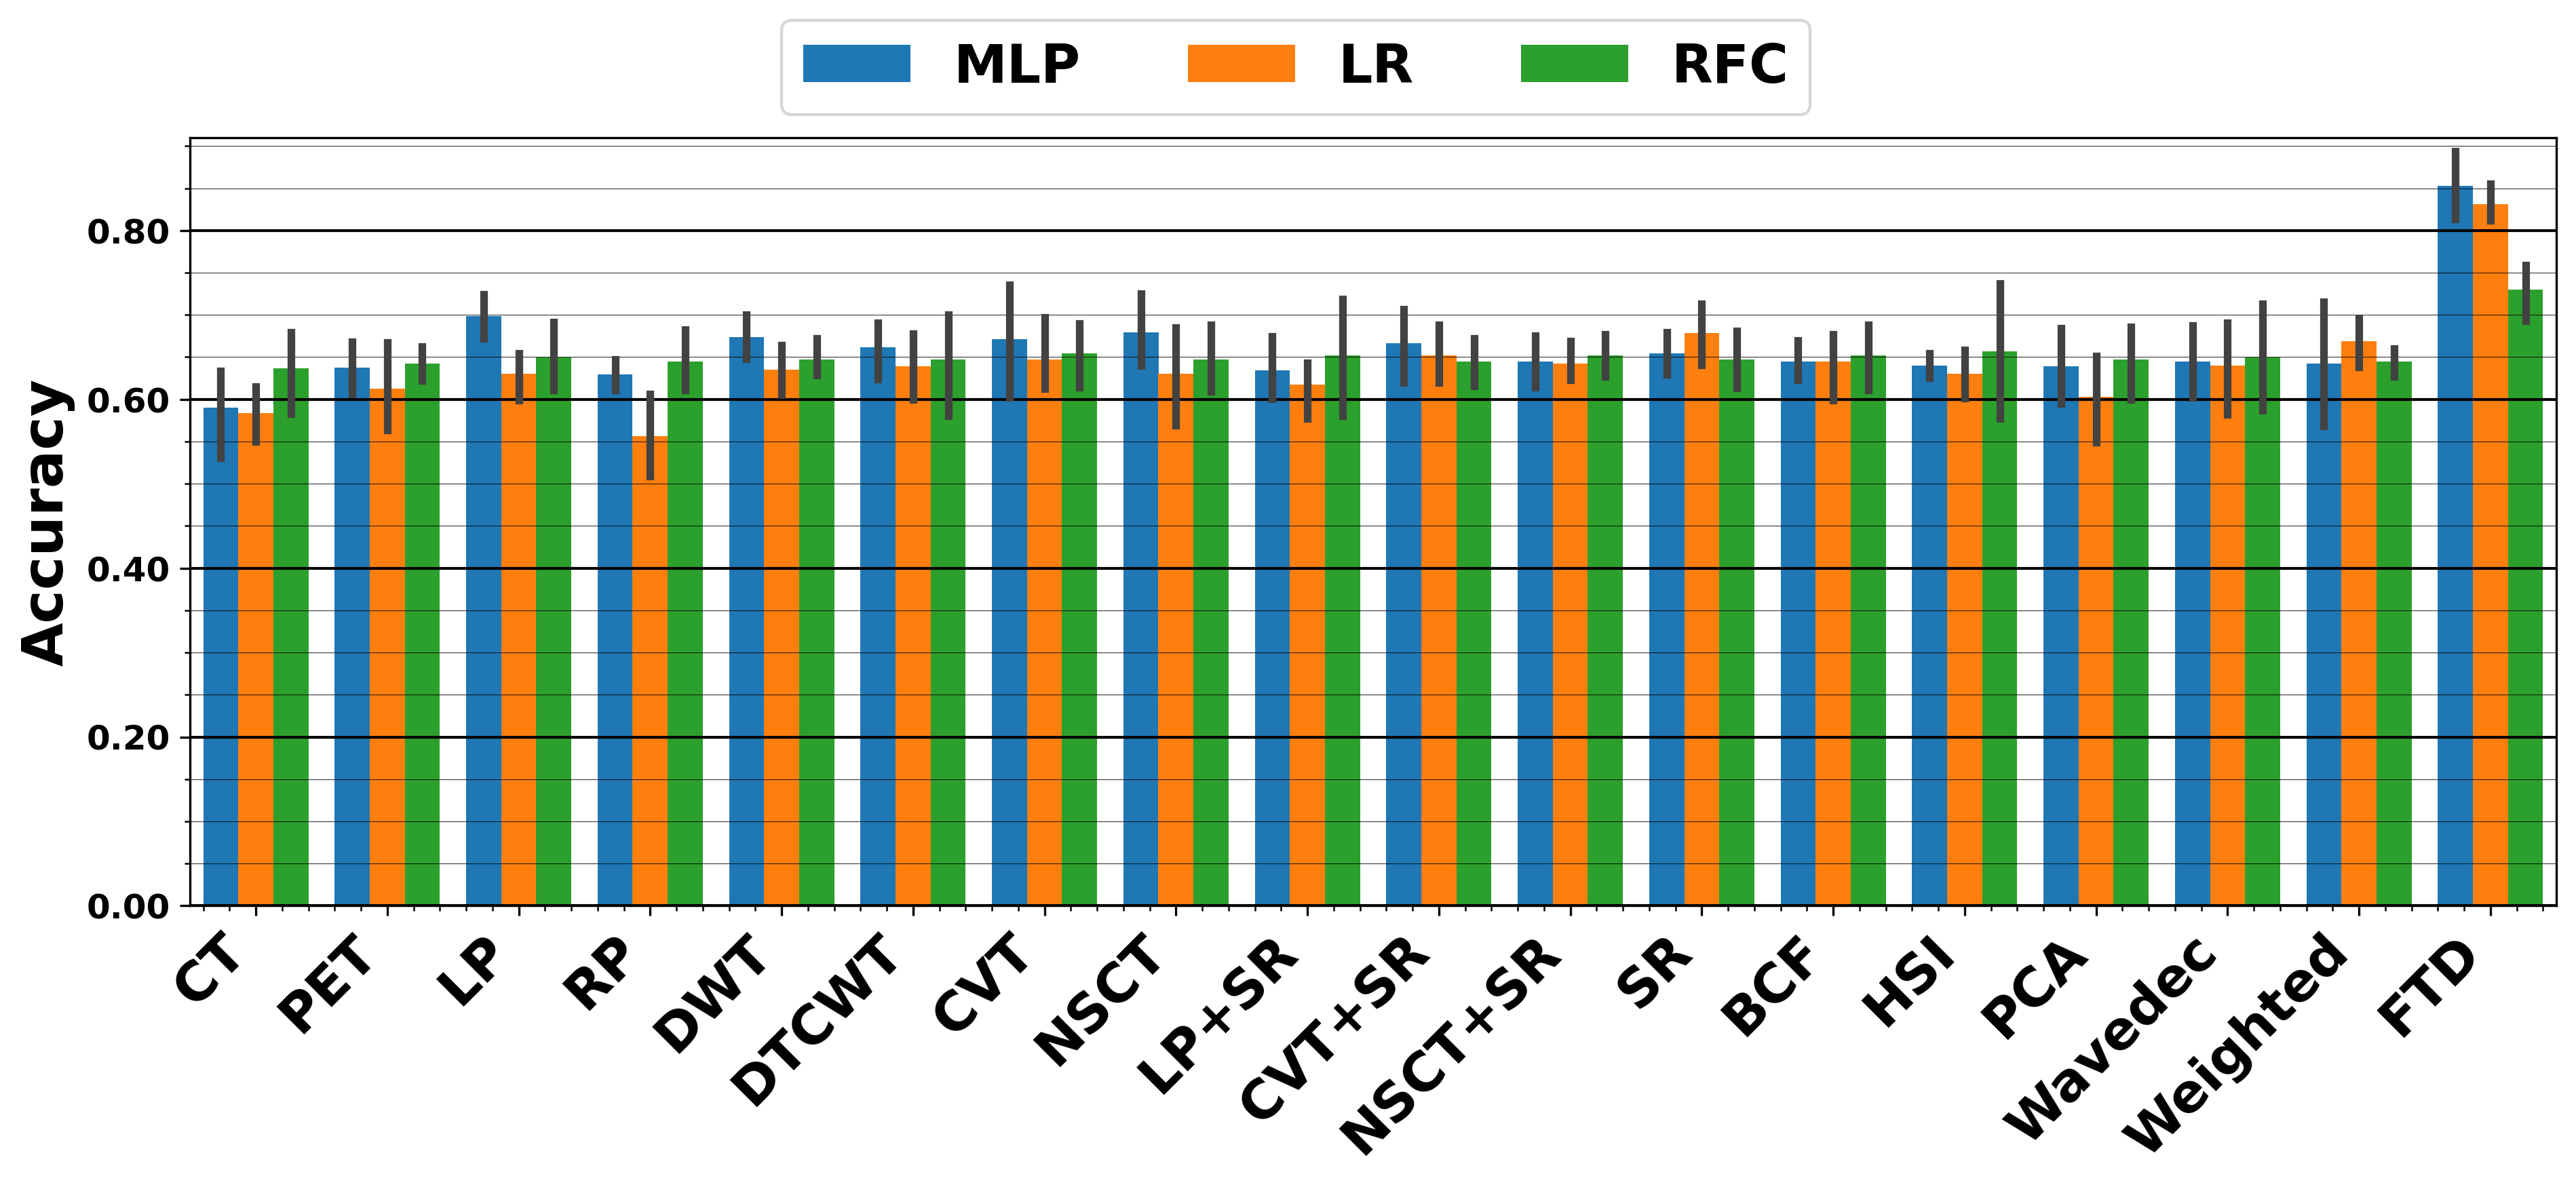

In [9]:
# ACC SCORE
hue_order = ['MLP', 'LR', 'RFC']
fi,axes = plt.subplots(1,1,figsize = (15,5),dpi = 300)
ax =sns.barplot(data=results, x = "data" , y = "Test Results",hue= "classifier",hue_order= hue_order,palette= "tab10" ,ax = axes,saturation=2)
ax.set_ylim(0,0.91)
# ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid( which='major', color='black', linewidth=1.0,axis = "y")
ax.grid( which='minor', color='black', linewidth=0.2,axis = "y")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=19,fontweight = "bold")
# ax.set_yticks(ax.get_yticklabels())
# ax.tick_params(axis='y', labelsize=60)
# ax.yaxis.set_tick_params(labelsize=24)
label_format = '{:,.2f}'
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format.format(x) for x in ticks_loc],fontsize=20,fontweight = "bold")


fd = {'fontsize': 15,"fontweight" :"bold"}
# ax.set_yticklabels(np.round(ax.get_yticks(),2),fontdict=fd)
legend_properties = {'weight':'bold',"size":19}
ax.legend(loc = (0.25,1.03),ncol=4,prop=legend_properties)
ax.set_xlabel("")
ax.set_ylabel("Accuracy",fontweight = "bold",fontsize = 20)
ax.yaxis.set_tick_params(labelsize=12)
plt.savefig("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/Test_Acc_scores_rf211.jpg",bbox_inches = "tight")

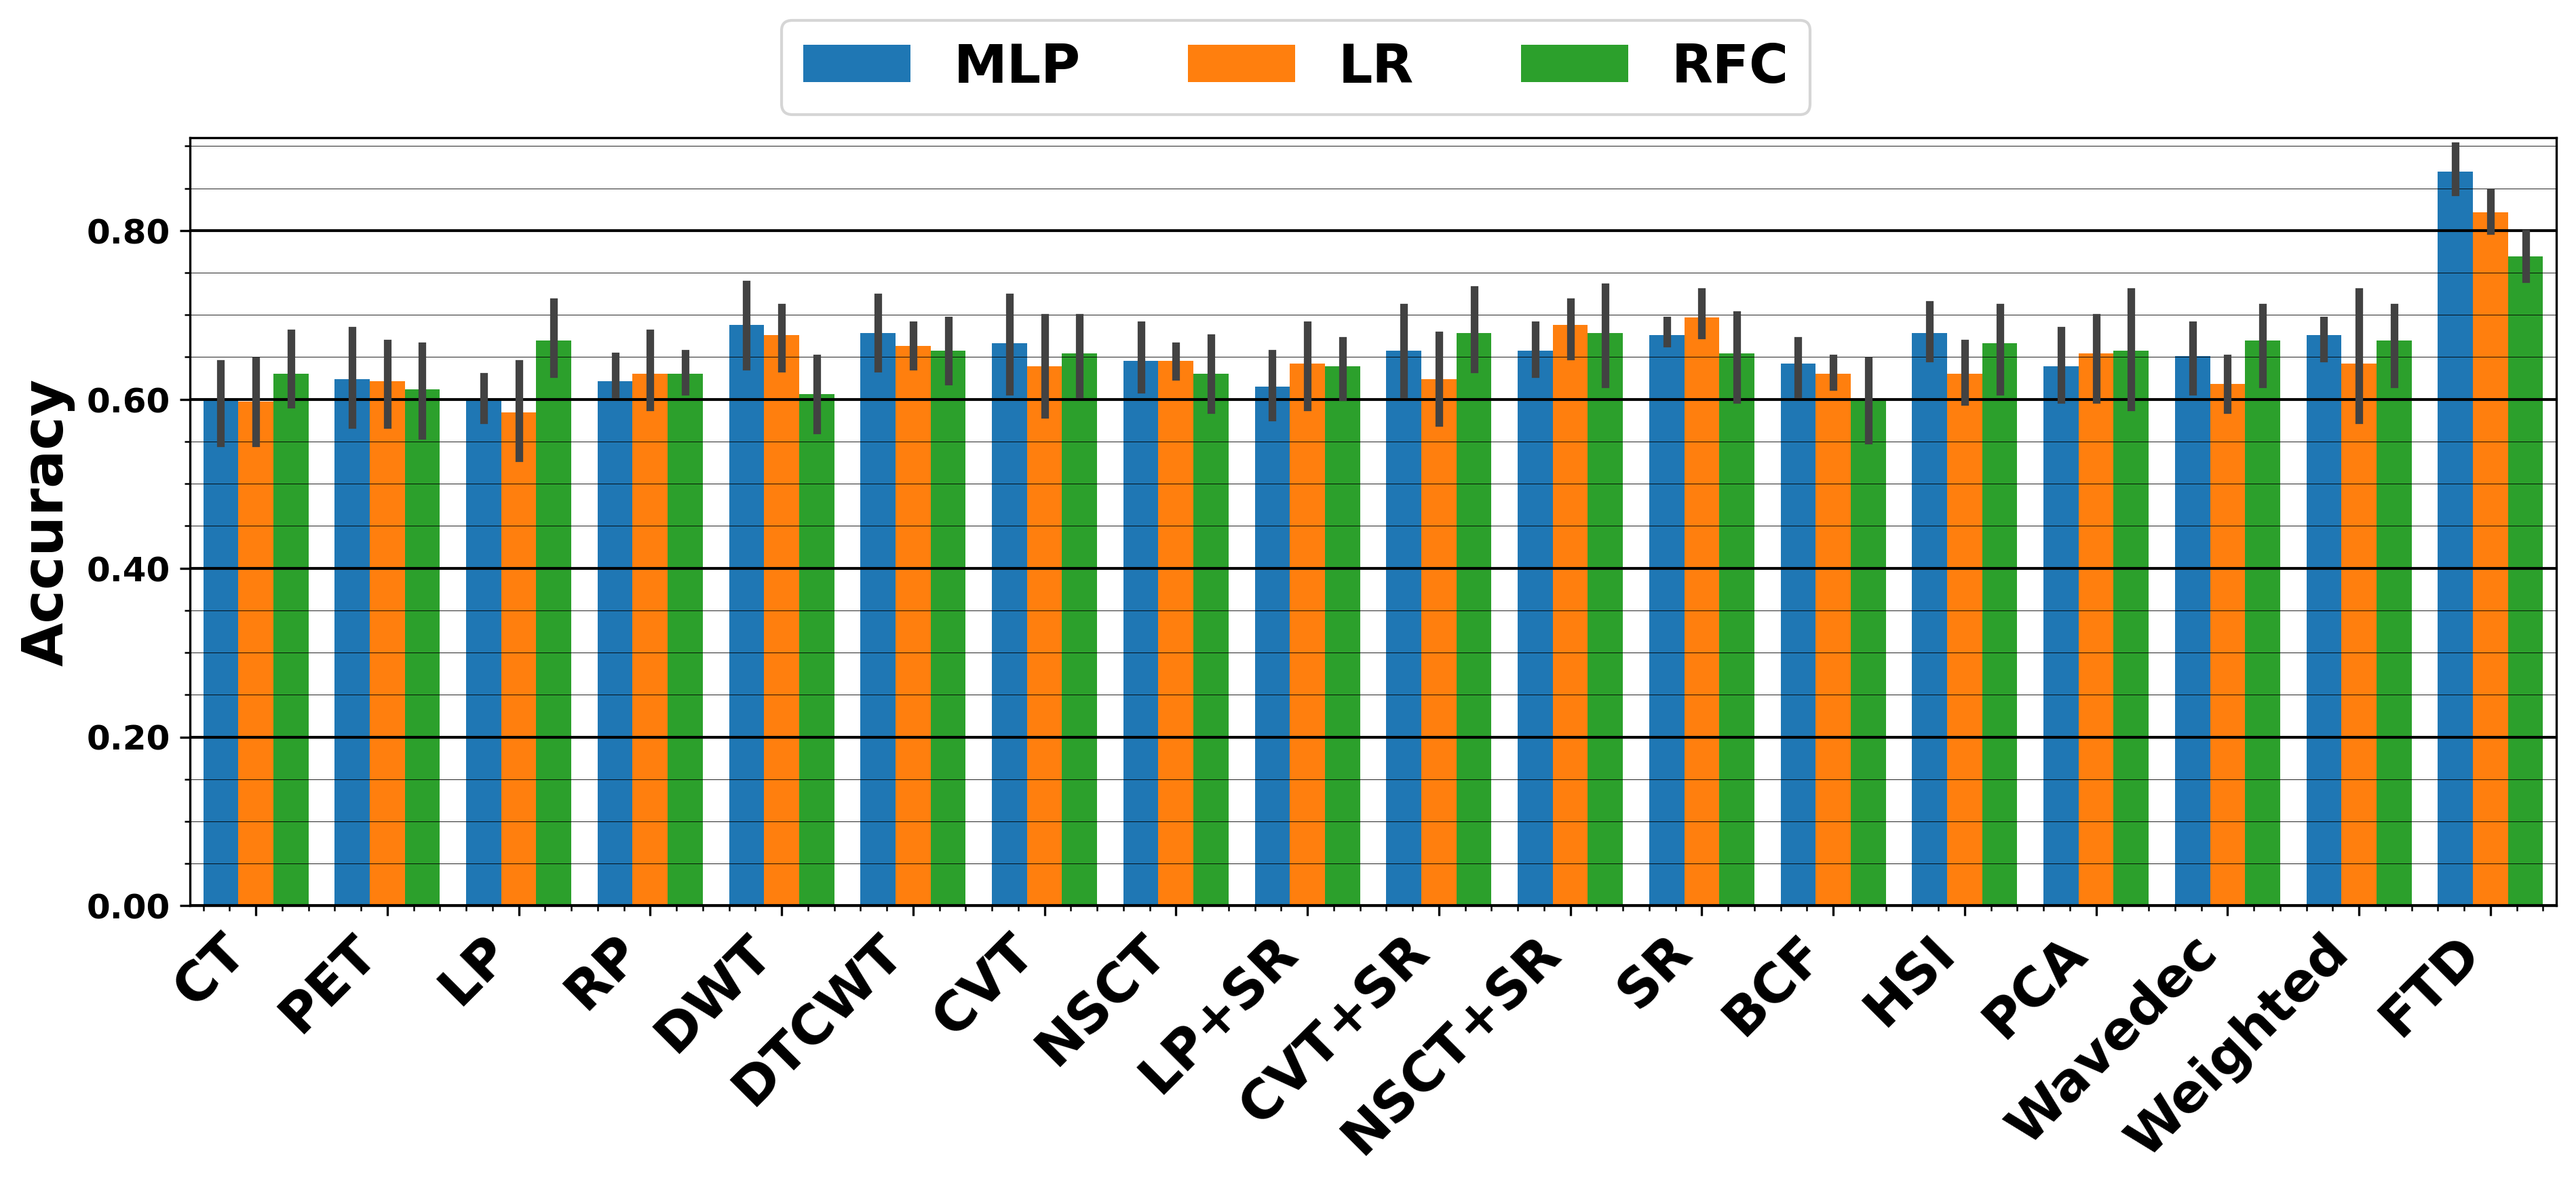

In [10]:
# ACC SCORE
hue_order = ['MLP', 'LR', 'RFC']

fi,axes = plt.subplots(1,1,figsize = (15,5),dpi = 300)
ax =sns.barplot(data=results, x = "data" , y = "Validation Results",hue= "classifier",palette= "tab10" ,ax = axes,saturation=2,hue_order= hue_order)
ax.set_ylim(0,0.91)
# ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid( which='major', color='black', linewidth=1.0,axis = "y")
ax.grid( which='minor', color='black', linewidth=0.2,axis = "y")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=19,fontweight = "bold")
# ax.set_yticks(ax.get_yticklabels())
# ax.tick_params(axis='y', labelsize=60)
# ax.yaxis.set_tick_params(labelsize=24)
label_format = '{:,.2f}'
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format.format(x) for x in ticks_loc],fontsize=20,fontweight = "bold")


fd = {'fontsize': 15,"fontweight" :"bold"}
# ax.set_yticklabels(np.round(ax.get_yticks(),2),fontdict=fd)
legend_properties = {'weight':'bold',"size":19}
ax.legend(loc = (0.25,1.03),ncol=4,prop=legend_properties)
ax.set_xlabel("")
ax.set_ylabel("Accuracy",fontweight = "bold",fontsize = 20)
ax.yaxis.set_tick_params(labelsize=12)
plt.savefig("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/Val_Acc_scores_rf211.jpg",bbox_inches = "tight")

In [12]:
import numpy as np
lst = []
for data in (np.array(results["data"])):
  if data not in lst:
    lst.append(data)

In [13]:
lst

['CT',
 'PET',
 'LP',
 'RP',
 'DWT',
 'DTCWT',
 'CVT',
 'NSCT',
 'LP+SR',
 'CVT+SR',
 'NSCT+SR',
 'SR',
 'BCF',
 'HSI',
 'PCA',
 'Wavedec',
 'Weighted',
 'FTD']